In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
size = 100
path = "augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/"

Displaying images from the 'MildDemented' category:


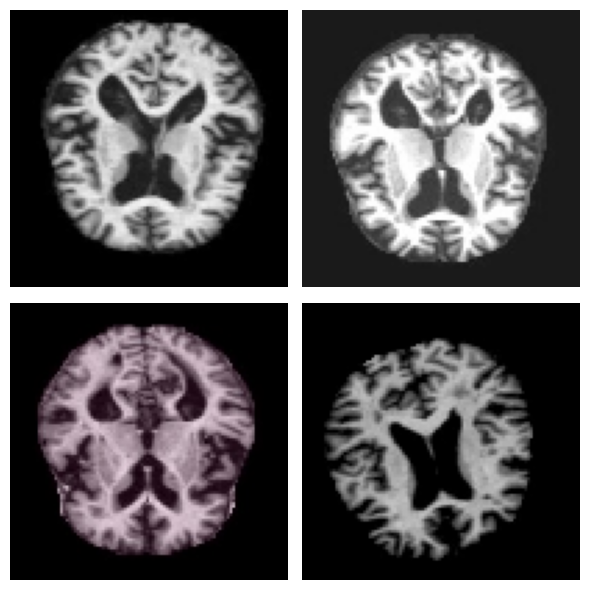

In [4]:
subclass = "MildDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

Displaying images from the 'ModerateDemented' category:


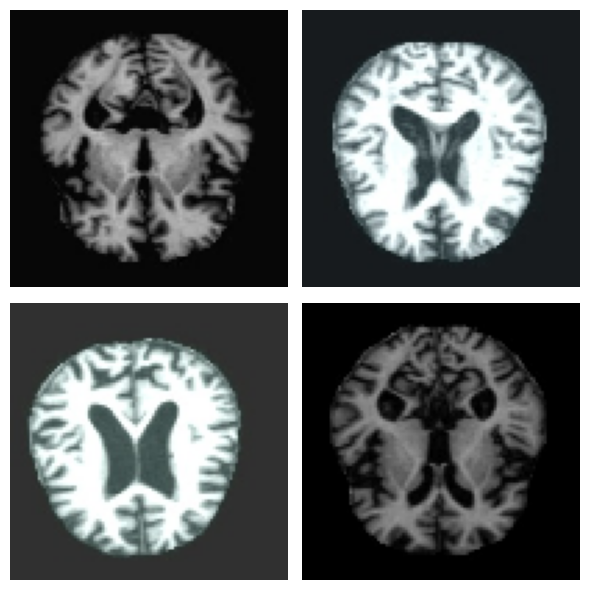

In [5]:
subclass = "ModerateDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

Displaying images from the 'VeryMildDemented' category:


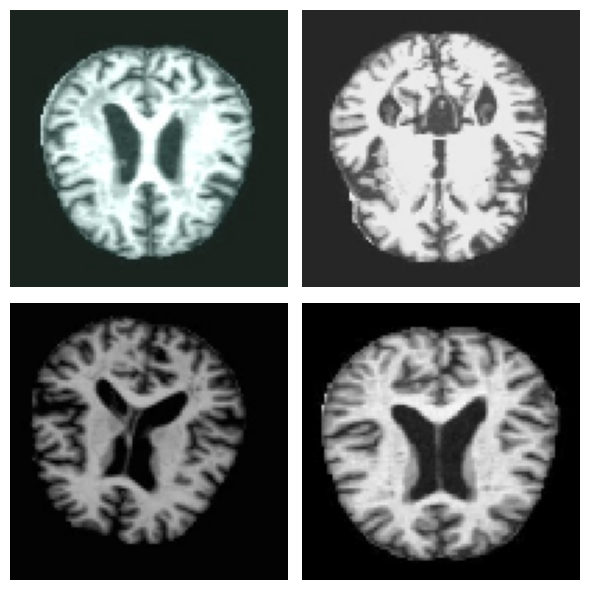

In [6]:
subclass = "VeryMildDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

Displaying images from the 'NonDemented' category:


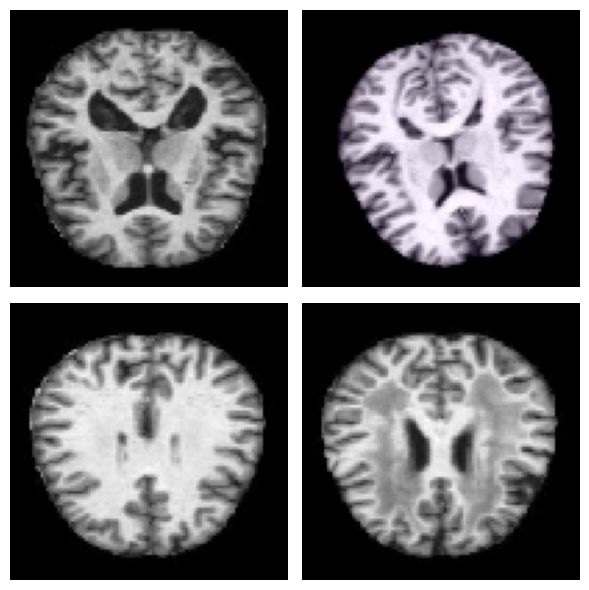

In [7]:
subclass = "NonDemented"

print(f"Displaying images from the '{subclass}' category:")

image_files = os.listdir(os.path.join(path, subclass))
selected_images = random.sample(image_files, 4)
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for ax, image_name in zip(axes.flatten(), selected_images):
    img_path = os.path.join(path, subclass, image_name)
    img = load_img(img_path, target_size=(size, size))
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [8]:
data_dir = pathlib.Path(path)

In [9]:
size_per_class = 3000

Mild_Demented = random.sample(list(data_dir.glob('MildDemented/*')), size_per_class)
Moderate_Demented = random.sample(list(data_dir.glob('ModerateDemented/*')), size_per_class)
Very_Mild_Demented = random.sample(list(data_dir.glob('VeryMildDemented/*')), size_per_class)
Non_Demented = random.sample(list(data_dir.glob('NonDemented/*')), size_per_class)

print(f"Selected {len(Mild_Demented)} images for Mild Demented class.")
print(f"Selected {len(Moderate_Demented)} images for Moderate Demented class.")
print(f"Selected {len(Very_Mild_Demented)} images for Very Mild Demented class.")
print(f"Selected {len(Non_Demented)} images for Non Demented class.")

Selected 3000 images for Mild Demented class.
Selected 3000 images for Moderate Demented class.
Selected 3000 images for Very Mild Demented class.
Selected 3000 images for Non Demented class.


In [10]:
df_images = {'Mild_Demented': Mild_Demented, 'Moderate_Demented': Moderate_Demented, 
             'Very_Mild_Demented': Very_Mild_Demented, 'Non_Demented': Non_Demented}

df_labels = {'Mild_Demented': 0, 'Moderate_Demented': 1, 'Very_Mild_Demented': 2, 'Non_Demented': 3}

In [11]:
x, y = [], []
image_size = (75, 75)

for label, image_paths in df_images.items():
    for img_path in image_paths:
        try:
            img = imread(str(img_path))
            resized_img = resize(img, image_size, anti_aliasing=True)
            x.append(resized_img)
            y.append(df_labels[label])
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

x = np.array(x)
y = np.array(y)

In [12]:
x = x/255.0

In [13]:
y = np.asarray(y).astype('float32').reshape((-1,1))
y = to_categorical(y, num_classes = 4)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [15]:
len(x_train)

9600

In [16]:
len(x_test)

2400

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

In [18]:
epochs = 20
input_shape = (75, 75, 3)

In [39]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)                   │ (None, 73, 73, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 73, 73, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 34, 34, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 15, 15, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,733,444 (6.61 MB)

 Trainable params: 1,732,996 (6.61 MB)

 Non-trainable params: 448 (1.75 KB)

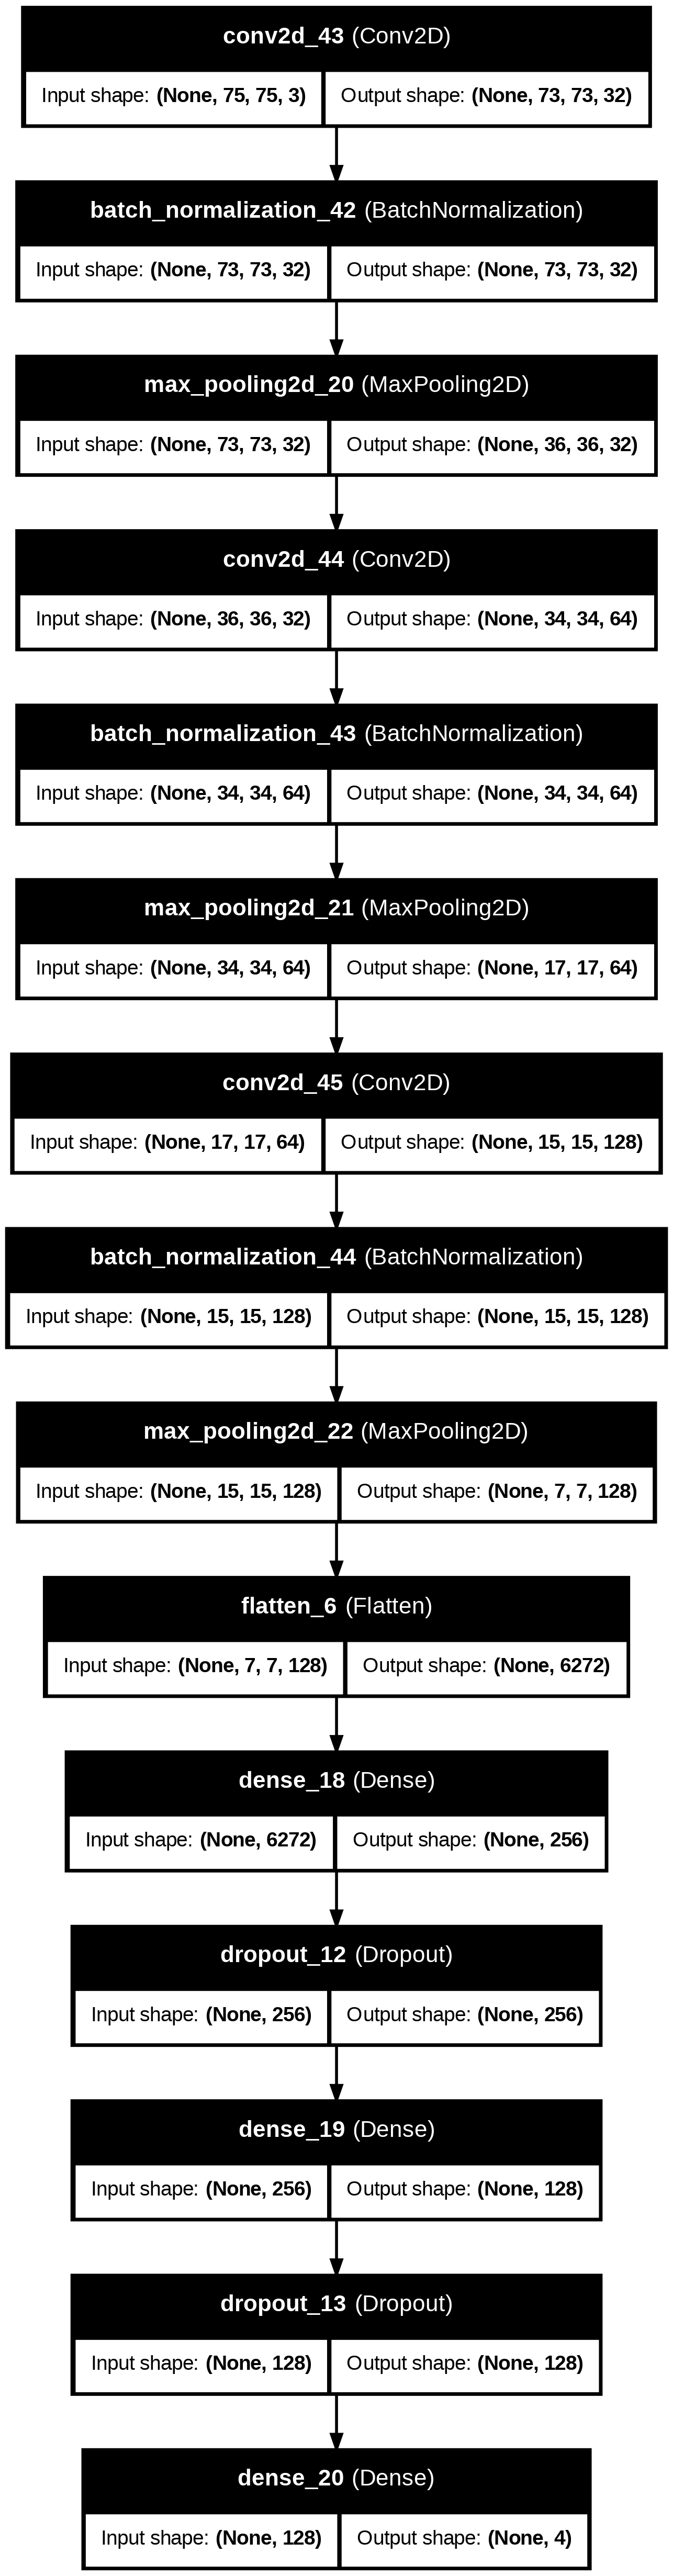

In [40]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [20]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.3128 - loss: 1.6432 - val_accuracy: 0.2375 - val_loss: 4.6146
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4419 - loss: 1.1129 - val_accuracy: 0.2546 - val_loss: 4.8236
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5484 - loss: 0.9281 - val_accuracy: 0.6217 - val_loss: 0.7849
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5981 - loss: 0.8287 - val_accuracy: 0.5575 - val_loss: 0.9505
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6472 - loss: 0.7465 - val_accuracy: 0.6529 - val_loss: 0.7870
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6710 - loss: 0.7015 - val_accuracy: 0.6687 - val_loss: 0.7664
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6840 - loss: 0.6835 - val_accuracy: 0.6633 - val_loss: 0.7052
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7191 - loss: 0.6269 - val_accuracy: 

In [21]:
def training_history(history, metrics=['loss', 'accuracy'], figsize=(10, 5)):
    
    for metric in metrics:
        plt.figure(figsize=figsize)
        plt.plot(history.history[metric], label=f"Training {metric.capitalize()}")
        plt.plot(history.history[f"val_{metric}"], label=f"Validation {metric.capitalize()}")
        plt.xlabel("Epochs")
        plt.ylabel(metric.capitalize())
        plt.title(f"Training and Validation {metric.capitalize()}")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

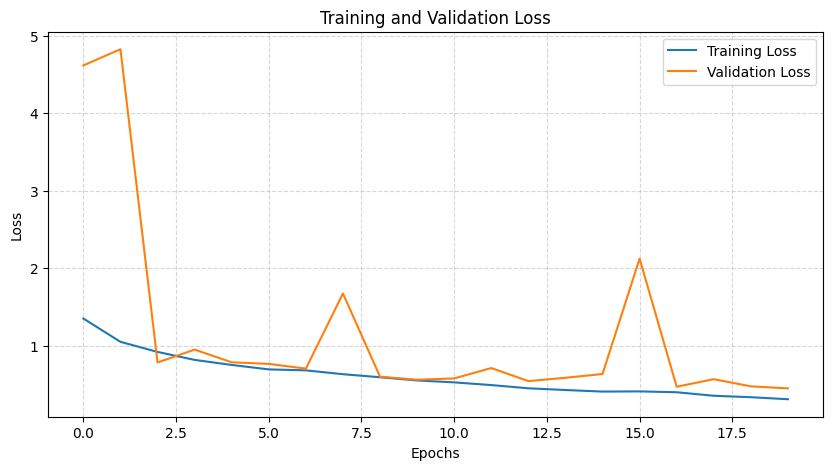

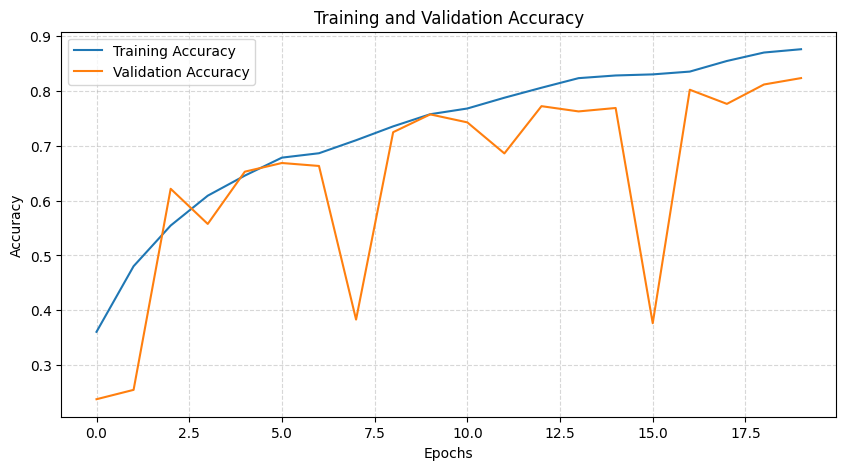

In [22]:
training_history(history)

In [41]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Third convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Fifth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)                   │ (None, 73, 73, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 73, 73, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 34, 34, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_49               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 4)                   │             5

 Total params: 1,354,020 (5.17 MB)

 Trainable params: 1,353,380 (5.16 MB)

 Non-trainable params: 640 (2.50 KB)

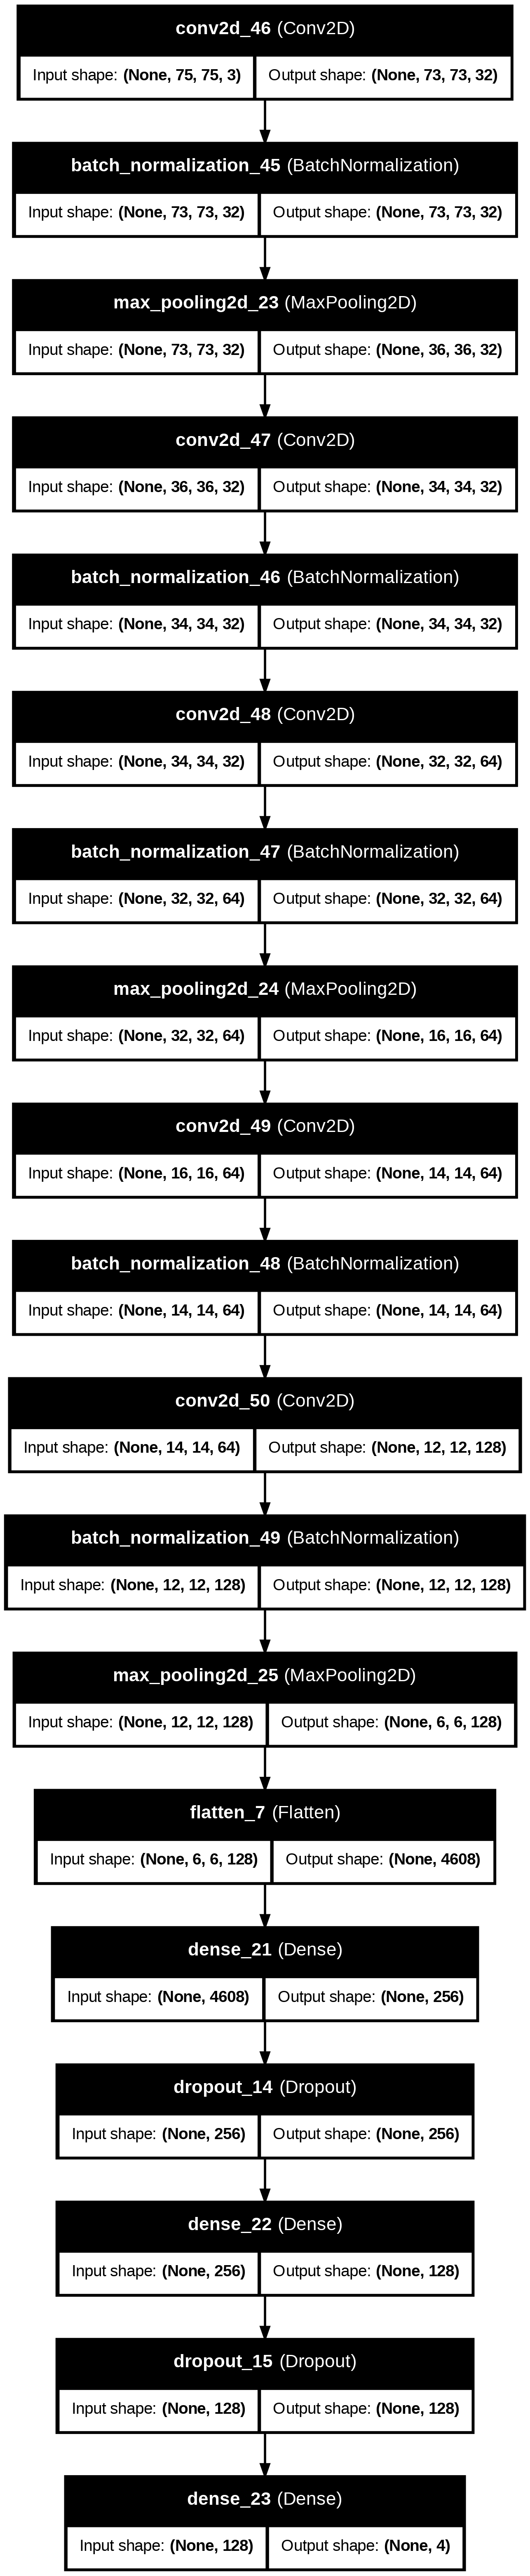

In [42]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [24]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.3285 - loss: 1.7226 - val_accuracy: 0.2375 - val_loss: 4.9539
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4713 - loss: 1.0721 - val_accuracy: 0.3350 - val_loss: 1.3792
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5606 - loss: 0.8864 - val_accuracy: 0.6550 - val_loss: 0.7641
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6080 - loss: 0.8070 - val_accuracy: 0.6212 - val_loss: 0.8059
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6367 - loss: 0.7502 - val_accuracy: 0.6913 - val_loss: 0.6787
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6601 - loss: 0.7093 - val_accuracy: 0.6896 - val_loss: 0.7371
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6642 - loss: 0.7016 - val_accuracy: 0.7179 - val_loss: 0.6211
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7191 - loss: 0.5848 - val_accuracy: 

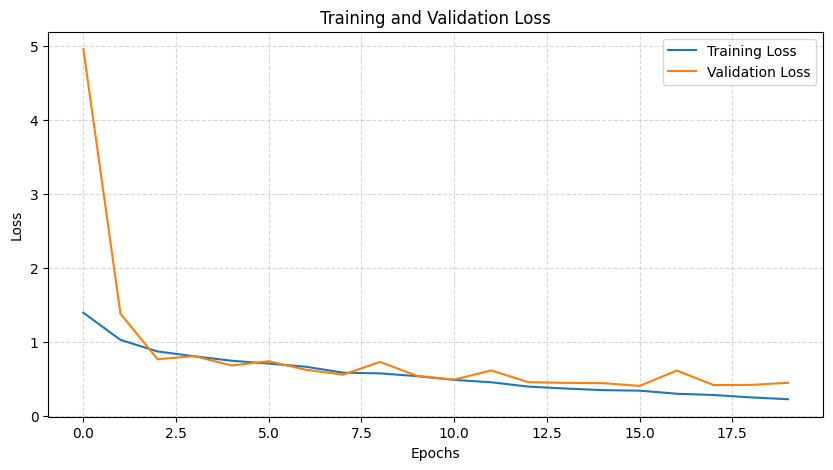

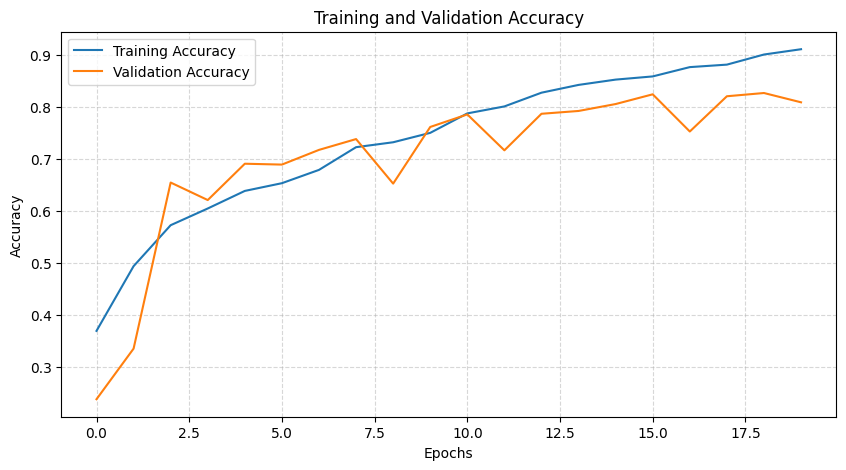

In [25]:
training_history(history)

In [43]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Third convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Fifth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Sixth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Seventh convolutional block
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)                   │ (None, 73, 73, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_50               │ (None, 73, 73, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_51               │ (None, 34, 34, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_52               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_53               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_54               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_55               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_56               │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 1, 1, 256)           │              

 Total params: 684,196 (2.61 MB)

 Trainable params: 682,788 (2.60 MB)

 Non-trainable params: 1,408 (5.50 KB)

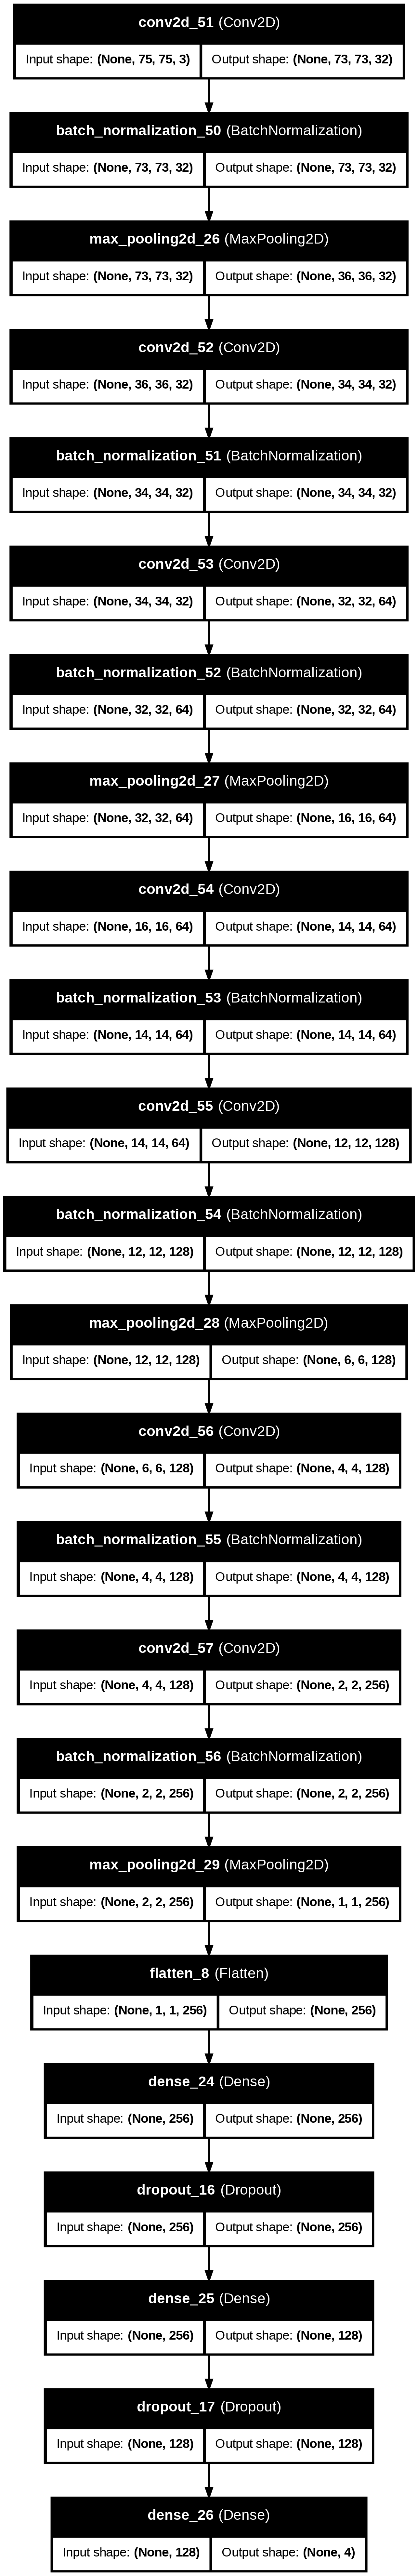

In [44]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [27]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.4281 - loss: 1.3339 - val_accuracy: 0.2375 - val_loss: 2.5910
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6183 - loss: 0.8153 - val_accuracy: 0.2375 - val_loss: 5.4247
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6859 - loss: 0.6689 - val_accuracy: 0.6746 - val_loss: 0.7079
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7406 - loss: 0.5727 - val_accuracy: 0.7229 - val_loss: 0.6250
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7791 - loss: 0.5035 - val_accuracy: 0.7729 - val_loss: 0.5184
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8236 - loss: 0.4253 - val_accuracy: 0.7483 - val_loss: 0.6420
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8492 - loss: 0.3701 - val_accuracy: 0.7987 - val_loss: 0.5094
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8827 - loss: 0.2930 - val_acc

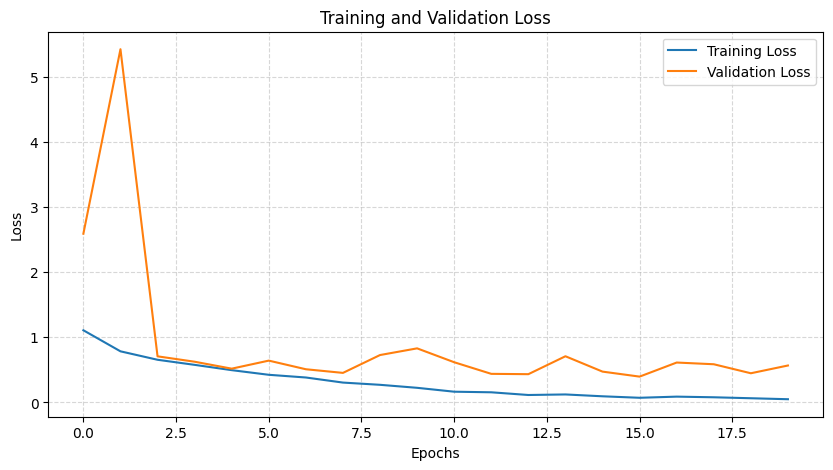

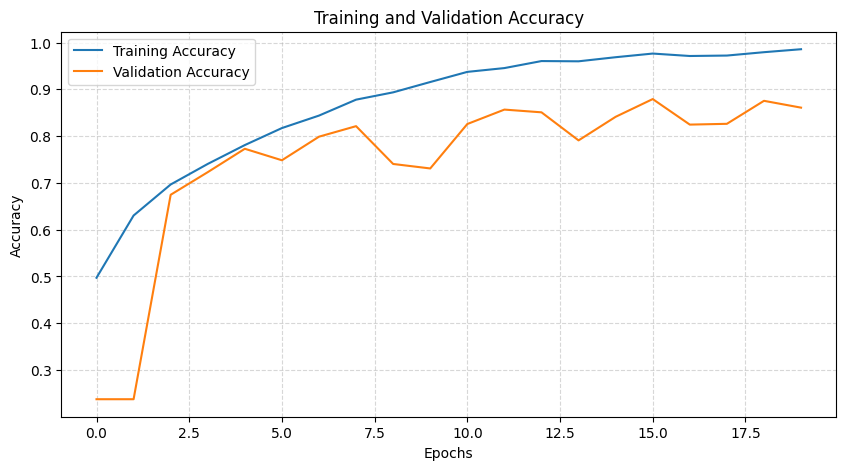

In [28]:
training_history(history)

In [45]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Third convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Fourth convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Fifth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Sixth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Seventh convolutional block
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Eighth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Ninth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)                   │ (None, 73, 73, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 73, 73, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 34, 34, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 30, 30, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_60               │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_61               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 26, 26, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_62               │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_63               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 22, 22, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_64               │ (None, 22, 22, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,586,596 (6.05 MB)

 Trainable params: 1,584,676 (6.05 MB)

 Non-trainable params: 1,920 (7.50 KB)

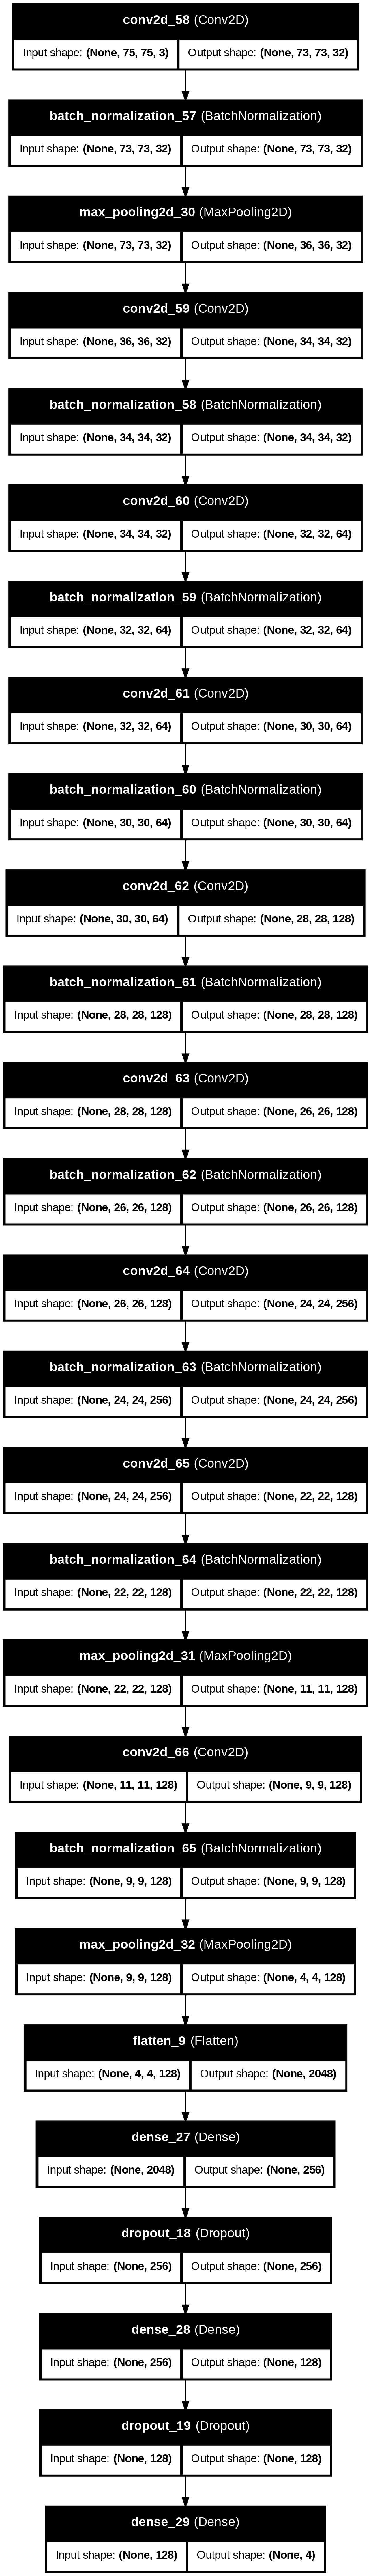

In [46]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [34]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.3735 - loss: 1.5801 - val_accuracy: 0.2375 - val_loss: 2.4354
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5721 - loss: 0.8982 - val_accuracy: 0.3983 - val_loss: 1.2381
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6299 - loss: 0.7687 - val_accuracy: 0.6471 - val_loss: 0.7236
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6711 - loss: 0.7024 - val_accuracy: 0.6279 - val_loss: 0.7902
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6958 - loss: 0.6513 - val_accuracy: 0.6896 - val_loss: 0.6818
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7210 - loss: 0.6122 - val_accuracy: 0.5950 - val_loss: 0.8977
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7458 - loss: 0.5573 - val_accuracy: 0.6667 - val_loss: 0.6639
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7745 - loss: 0.4821 - v

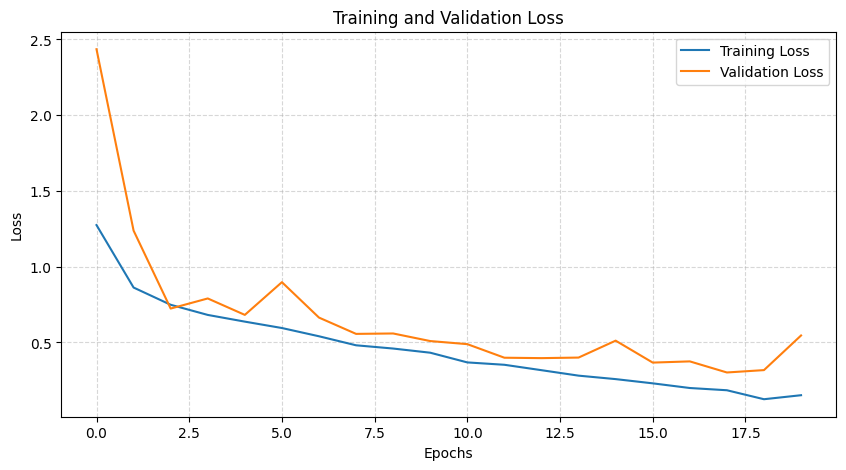

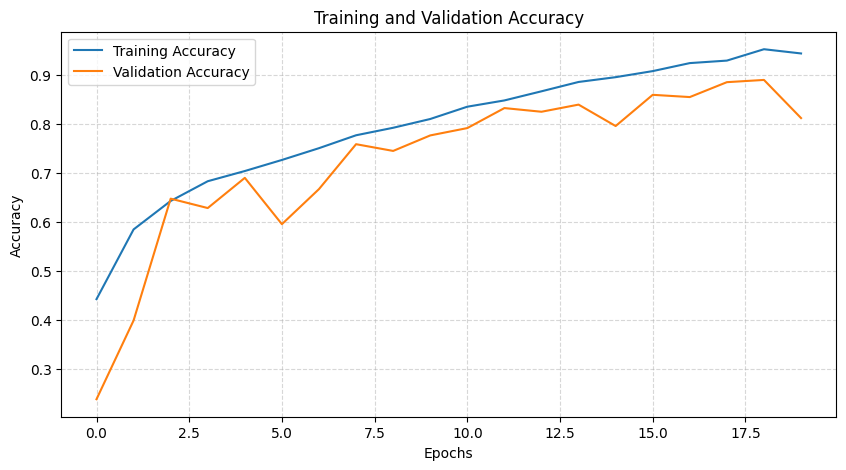

In [35]:
training_history(history)

In [36]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Third convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Fourth convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Fifth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Sixth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Seventh convolutional block
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Eighth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Ninth convolutional block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Tenth convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Eleventh convolutional block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 73, 73, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 73, 73, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 34, 34, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 30, 30, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 26, 26, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 22, 22, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 22, 22, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,320,996 (5.04 MB)

 Trainable params: 1,318,820 (5.03 MB)

 Non-trainable params: 2,176 (8.50 KB)

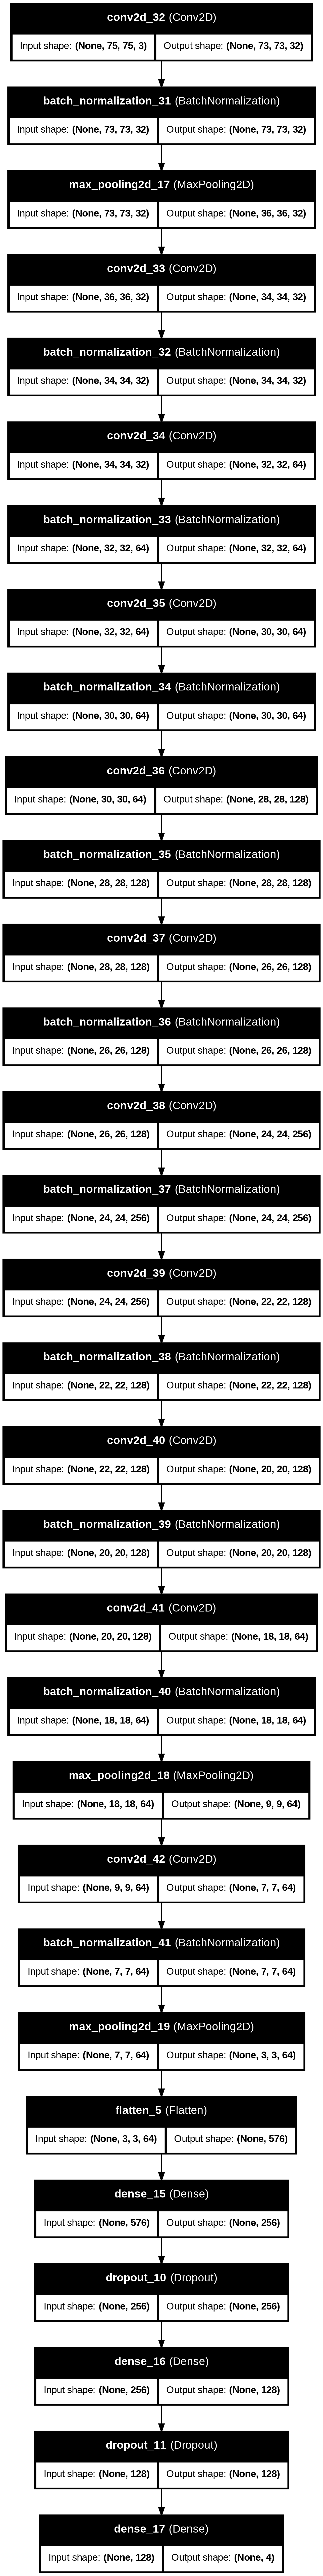

In [38]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [37]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.3711 - loss: 1.4622 - val_accuracy: 0.2571 - val_loss: 2.8754
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.5879 - loss: 0.8480 - val_accuracy: 0.2646 - val_loss: 2.7816
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6600 - loss: 0.7274 - val_accuracy: 0.6467 - val_loss: 0.8363
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6914 - loss: 0.6636 - val_accuracy: 0.5979 - val_loss: 0.7743
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.7283 - loss: 0.5966 - val_accuracy: 0.6558 - val_loss: 0.7080
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7474 - loss: 0.5400 - val_accuracy: 0.6771 - val_loss: 0.7220
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7682 - loss: 0.5117 - val_accuracy: 0.6463 - val_loss: 0.9397
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7935 - loss: 0.4574 - 

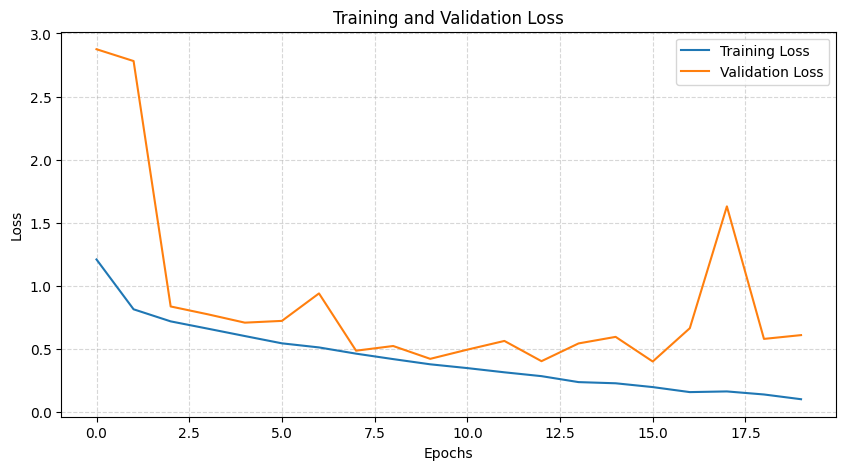

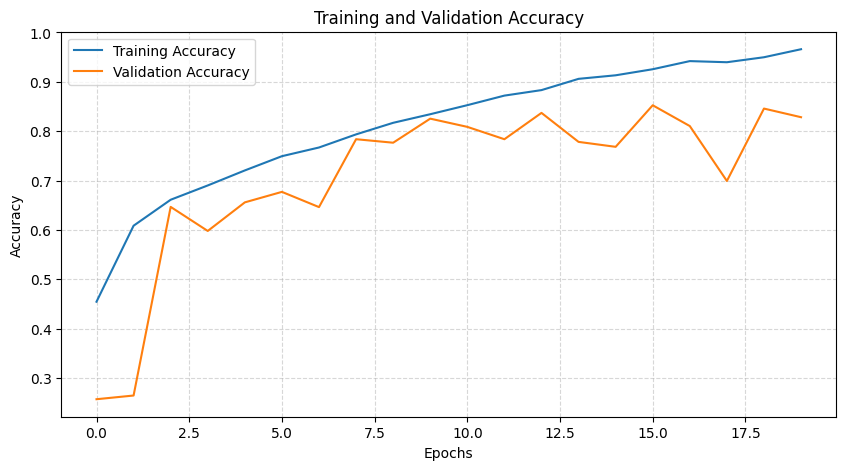

In [47]:
training_history(history)